# Importação das bibliotecas iniciais que foram utilizadas

1- pandas: O pandas é uma biblioteca de software escrita em Python para manipulação e análise de dados. No código, ele é usado para ler os dados do arquivo CSV e armazená-los em um DataFrame para manipulação. Usado também para criar um novo DataFrame com os dados filtrados "dropna()".

2- sklearn: O sklearn é uma biblioteca de machine learning em Python que fornece uma variedade de algoritmos de aprendizado de máquina, e como no nosso projeto inicial era usar árvores de decisão, foi necessário importar o módulo "tree" do sklearn. Usada para dividir os dados em conjuntos de treinamento e teste com a função "train_test_split()" e para calcular a acurácia do modelo com a função "accuracy_score()".

3- matplotlib: O matplotlib é uma biblioteca de visualização de dados em Python que permite criar gráficos e visualizações de dados. No código, ele é usado para criar um gráfico de árvore de decisão com a função "plot_tree()" do módulo "tree" do sklearn.


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suprimir o SettingWithCopyWarning do pandas
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Suprimir o UndefinedMetricWarning do scikit-learn
warnings.simplefilter(action='ignore', category=UndefinedMetricWarning)


# Codigo - Primeiro Experimento

Esse é o código que utiliza árvore de decisão que deu início ao nosso projeto, resultando em muitos problemas, seja na limpeza dos dados ou nas predições, tendo em vista que muitos dos casos reais, que eram usados como exemplo, resultavam em "Casos Não Especificados", causando conflitos para o resultado final, já que na grande parte das vezes resultava em casos que não eram bem detalhados e especificados, deixando em aberto a análise.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Carregar os dados desequilibrados
df = pd.read_csv('INFLUD23.csv', sep=';', encoding='latin1')

# Remover linhas com CLASSI_FIN ausente
df = df[~df['CLASSI_FIN'].isna()]

# 2. Definir os sintomas usados para treino
sintomas = [
    'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO',
    'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'PUERPERA', 'FATOR_RISC', 'CARDIOPATI',
    'HEMATOLOGI', 'HOSPITAL', 'UTI', 'DIABETES', 'OBESIDADE'
]

# 3. Preparar os dados
X = df[sintomas].replace(9, np.nan).fillna(0)
y = df['CLASSI_FIN']

# 4. Separar treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Treinar modelo
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

# 6. Avaliação do modelo
acuracia = modelo.score(X_test, y_test)
print(f"Acurácia do modelo (base desequilibrada): {acuracia:.4f}")

# 7. Mostrar distribuição original de classes
print("\nDistribuição das classes na base:")
print(y.value_counts(normalize=True))

# 8. Matriz de confusão e relatório
y_pred = modelo.predict(X_test)
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))

# Relatório detalhado com 4 casas decimais
relatorio = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

print("\nMétricas detalhadas (4 casas decimais):")
for classe, metricas in relatorio.items():
    print(f"\n{classe.capitalize() if isinstance(classe, str) else f'Classe {classe}'}")
    if isinstance(metricas, dict):
        for metrica, valor in metricas.items():
            print(f"  {metrica.capitalize():<12}: {valor:.4f}")
    else:
        print(f"  Valor        : {metricas:.4f}")

# Resumo das médias
print("\nResumo das médias principais:")
for key in ["accuracy", "macro avg", "weighted avg"]:
    print(f"\n{key.capitalize()}:")
    if isinstance(relatorio[key], dict):
        for metrica in ["precision", "recall", "f1-score"]:
            print(f"  {metrica.capitalize():<12}: {relatorio[key][metrica]:.4f}")
    else:
        print(f"  Valor        : {relatorio[key]:.4f}")

# 9. Coletar input do usuário
print("\nAgora você pode testar a árvore com seus próprios sintomas:")

entrada_usuario = {}
for var in sintomas:
    while True:
        try:
            entrada_usuario[var] = int(input(f"{var} (0 = Não, 1 = Sim): "))
            break
        except:
            print("Entrada inválida. Digite 0 ou 1.")

# 10. Fazer predição com o input
df_input = pd.DataFrame([entrada_usuario])
pred = modelo.predict(df_input)[0]

# 11. Mostrar saída
classes = {
    1: 'SRAG por Influenza',
    2: 'SRAG por Outro Vírus Respiratório',
    3: 'SRAG por Outro Agente Etiológico',
    4: 'SRAG Não Especificado',
    5: 'SRAG por COVID-19'
}

print(f"\n🧠 Classificação provável: {classes.get(pred, 'Desconhecida')} (classe {pred})")


C:\Users\Mateu\AppData\Local\Temp\ipykernel_27344\1144023012.py:8: DtypeWarning: Columns (15,18,20,23,61,62,63,72,74,79,91,93,108,109,120,130,143,171,175,178) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('INFLUD23.csv', sep=';', encoding='latin1')


Acurácia do modelo (base desequilibrada): 0.5747

Distribuição das classes na base:
CLASSI_FIN
4.0    0.570788
5.0    0.185230
2.0    0.180917
1.0    0.049512
3.0    0.013553
Name: proportion, dtype: float64

Matriz de Confusão:
[[  264     0     0  3796    65]
 [   39     0     0 14647    51]
 [    3     0     0  1051    32]
 [  147     0     0 45608   589]
 [   74     0     0 14057   812]]

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.50      0.06      0.11      4125
         2.0       0.00      0.00      0.00     14737
         3.0       0.00      0.00      0.00      1086
         4.0       0.58      0.98      0.73     46344
         5.0       0.52      0.05      0.10     14943

    accuracy                           0.57     81235
   macro avg       0.32      0.22      0.19     81235
weighted avg       0.45      0.57      0.44     81235


Métricas detalhadas (4 casas decimais):

1.0
  Precision   : 0.5009
  Recall      : 0.

# Codigo - Segundo Experimento

Feita utilizando um número menor de colunas e uma lógica diferente para a limpeza de dados com valores nulos, resultando numa acurácia de aproximadamente 0.60

Leitura do arquivo de 2023

In [22]:
arquivo = 'INFLUD23.csv'
df = pd.read_csv(arquivo, sep=';', encoding='latin1', low_memory=False)

# Seleção das colunas e limpeza dos dados com valores nulos

Aqui selecionamos as colunas que serão utilizadas para o modelo e também limpamos os dados com valores nulos mostrando a quantidade de dados que haviam antes e depois da limpeza.

In [23]:
# Selecionar as colunas que serão usadas na análise
colunas = ['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO',
           'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'PUERPERA', 'FATOR_RISC', 'CARDIOPATI',
           'HEMATOLOGI', 'CLASSI_FIN']

# Criar base com apenas essas colunas
base = df[colunas].copy()

# Verificar total de linhas antes da limpeza
total_antes = base.shape[0]

# Contar quantas linhas têm pelo menos um valor nulo
linhas_com_nulos = base.isnull().any(axis=1).sum()

# Mostrar resumo da situação antes
print("📋 Resumo antes da limpeza:")
print(f"→ Total de linhas originais: {total_antes}")
print(f"→ Linhas com pelo menos um valor nulo: {linhas_com_nulos}")
print(f"→ Linhas completas (sem nenhum nulo): {total_antes - linhas_com_nulos}")
print(f"→ Percentual de dados a serem removidos (nulos): {100 * linhas_com_nulos / total_antes:.2f}%")

# Aplicar limpeza: remover qualquer linha com pelo menos um valor nulo
base = base.dropna()

# Garantir que CLASSI_FIN seja inteiro
base['CLASSI_FIN'] = base['CLASSI_FIN'].astype(int)

# Verificar total de linhas após a limpeza
total_depois = base.shape[0]

# Mostrar resumo final
print("\n🧹 Resumo após a limpeza:")
print(f"→ Total de linhas restantes: {total_depois}")
print(f"→ Linhas removidas por nulos: {linhas_com_nulos}")
print(f"→ Total de linhas removidas: {total_antes - total_depois}")


📋 Resumo antes da limpeza:
→ Total de linhas originais: 278958
→ Linhas com pelo menos um valor nulo: 208621
→ Linhas completas (sem nenhum nulo): 70337
→ Percentual de dados a serem removidos (nulos): 74.79%

🧹 Resumo após a limpeza:
→ Total de linhas restantes: 70337
→ Linhas removidas por nulos: 208621
→ Total de linhas removidas: 208621


# Separação dos dados para treino e teste e treinamento do modelo

Aqui, iremos separar os dados em conjuntos de treino e teste, treinar o modelo de árvore de decisão para avaliação.

X - contém todas as colunas do DataFrame, exceto a coluna "CLASSI_FIN", que é a variável alvo que queremos prever.

y - contém apenas a coluna "CLASSI_FIN", que é a variável alvo que queremos prever.

X_train, X_test, y_train, y_test - são as variáveis que armazenarão os conjuntos de treino e teste separando 80% dos dados para treino e 20% para teste (test_size=0.2).

DecisionTreeClassifier - é a classe que representa o modelo de árvore de decisão, limitando a profundidade máxima da árvore para 6 (max_depth=6), treinando o modelo utilizando clf.fit(X_train, y_train).

In [24]:
# Separar entrada e saída
X = base.drop('CLASSI_FIN', axis=1)
y = base['CLASSI_FIN']

# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, random_state=42)

# Avaliação e visualização da árvore de decisão

Parte final que avalia a árvore de decisão, mostrando a precisão, recall, f1-score, support de cada caso e acurácia geral da árvore.

📊 Modelo sem limpeza total:
Acurácia: 0.5972419675860108

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       605
           2       1.00      0.00      0.00      1256
           3       0.00      0.00      0.00       258
           4       0.61      0.94      0.74      8253
           5       0.51      0.17      0.26      3696

    accuracy                           0.60     14068
   macro avg       0.42      0.22      0.20     14068
weighted avg       0.58      0.60      0.50     14068


Métricas detalhadas (4 casas decimais):

1
  Precision   : 0.0000
  Recall      : 0.0000
  F1-score    : 0.0000
  Support     : 605.0000

2
  Precision   : 1.0000
  Recall      : 0.0008
  F1-score    : 0.0016
  Support     : 1256.0000

3
  Precision   : 0.0000
  Recall      : 0.0000
  F1-score    : 0.0000
  Support     : 258.0000

4
  Precision   : 0.6061
  Recall      : 0.9415
  F1-score    : 0.7374
  Support     : 8253

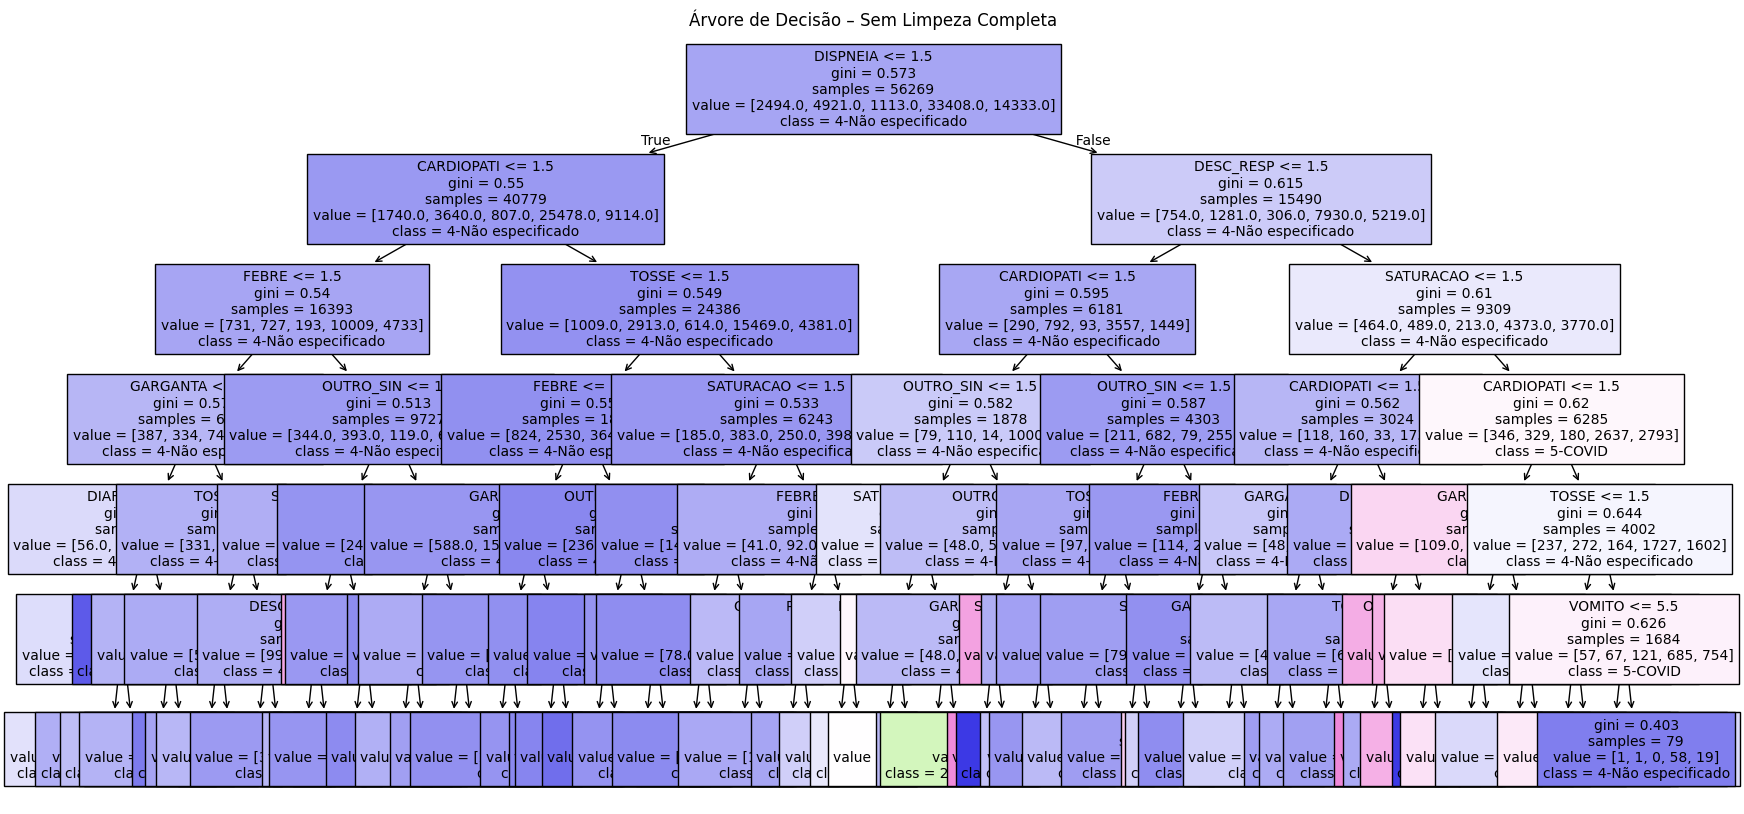

In [26]:
# Avaliação
y_pred = clf.predict(X_test)
print("📊 Modelo sem limpeza total:")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Relatório detalhado com 4 casas decimais
relatorio = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

print("\nMétricas detalhadas (4 casas decimais):")
for classe, metricas in relatorio.items():
    print(f"\n{classe.capitalize() if isinstance(classe, str) else f'Classe {classe}'}")
    if isinstance(metricas, dict):
        for metrica, valor in metricas.items():
            print(f"  {metrica.capitalize():<12}: {valor:.4f}")
    else:
        print(f"  Valor        : {metricas:.4f}")

# Resumo das médias
print("\nResumo das médias principais:")
for key in ["accuracy", "macro avg", "weighted avg"]:
    print(f"\n{key.capitalize()}:")
    if isinstance(relatorio[key], dict):
        for metrica in ["precision", "recall", "f1-score"]:
            print(f"  {metrica.capitalize():<12}: {relatorio[key][metrica]:.4f}")
    else:
        print(f"  Valor        : {relatorio[key]:.4f}")

# Visualizar árvore
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns,
          class_names=['1-Influenza', '2-Outros Vírus Respiratório', '3-Outros Agentes Etiológicos', '4-Não especificado', '5-COVID'],
          filled=True, fontsize=10)
plt.title("Árvore de Decisão – Sem Limpeza Completa")
plt.show()


# CODIGO - Terceiro Experimento

Após notar que o caso 4, casos "Não especificado", estava atrapalhando a análise e era um resultado que não traria nenhuma resposta útil, esses casos foram retirados o que causou uma melhora na acurácia do modelo e dos outros casos. E também acabamos analisando melhor a tabela dos dados e coletamos mais colunas que seriam úteis para a análise e melhora na acurácia.

Abaixo está o codigo da limpeza dos dados com essas todas essas mudanças que acabou gerando em um aumento da acurácia para aproximadamente 0.7

In [27]:
# Selecionar as colunas que serão usadas na análise
colunas = ['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO',
           'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'PUERPERA', 'FATOR_RISC', 'CARDIOPATI',
           'HEMATOLOGI', 'CLASSI_FIN', 'FADIGA', 'PERD_OLFT', 'PERD_PALA', 'PNEUMOPATI', 
           'DIABETES', 'OBESIDADE', 'RENAL', 'ASMA', 'VACINA', 'HOSPITAL']


# Criar base com apenas essas colunas
base = df[colunas].copy()

# Verificar total de linhas antes da limpeza
total_antes = base.shape[0]

print(f"→ Quantidades de casos ANTES da limpeza: {base['CLASSI_FIN'].value_counts().sort_index()}")

# Contar quantas linhas têm pelo menos um valor nulo
linhas_com_nulos = base.isnull().any(axis=1).sum()

# Mostrar resumo da situação antes
print("\nResumo antes da limpeza:")
print(f"→ Total de linhas originais: {total_antes}")
print(f"→ Linhas com pelo menos um valor nulo: {linhas_com_nulos}")
print(f"→ Linhas completas (sem nenhum nulo): {total_antes - linhas_com_nulos}")
print(f"→ Percentual de dados a serem removidos (nulos): {100 * linhas_com_nulos / total_antes:.2f}%")

# Aplicar limpeza: remover qualquer linha com pelo menos um valor nulo
base = base.dropna()

# Garantir que CLASSI_FIN seja inteiro
base['CLASSI_FIN'] = base['CLASSI_FIN'].astype(int)

# Contar quantas linhas têm CLASSI_FIN == 4
linhas_classi_4 = (base['CLASSI_FIN'] == 4).sum()

# Remover linhas onde CLASSI_FIN == 4
base = base[base['CLASSI_FIN'] != 4]

# Verificar total de linhas após a limpeza
total_depois = base.shape[0]

# Mostrar resumo final
print("\nResumo após a limpeza:")
print(f"→ Total de linhas restantes: {total_depois}")
print(f"→ Linhas removidas por nulos: {linhas_com_nulos}")
print(f"→ Linhas removidas com CLASSI_FIN == 4: {linhas_classi_4}")
print(f"→ Total de linhas removidas: {total_antes - total_depois}\n")
print(f"→ Quantidades de casos DEPOIS da limpeza e REMOÇÃO dos casos 4: {base['CLASSI_FIN'].value_counts().sort_index()}")



→ Quantidades de casos ANTES da limpeza: CLASSI_FIN
1.0     13407
2.0     48989
3.0      3670
4.0    154559
5.0     50157
Name: count, dtype: int64

Resumo antes da limpeza:
→ Total de linhas originais: 278958
→ Linhas com pelo menos um valor nulo: 227165
→ Linhas completas (sem nenhum nulo): 51793
→ Percentual de dados a serem removidos (nulos): 81.43%

Resumo após a limpeza:
→ Total de linhas restantes: 20762
→ Linhas removidas por nulos: 227165
→ Linhas removidas com CLASSI_FIN == 4: 31031
→ Total de linhas removidas: 258196

→ Quantidades de casos DEPOIS da limpeza e REMOÇÃO dos casos 4: CLASSI_FIN
1     2391
2     4414
3      551
5    13406
Name: count, dtype: int64


In [28]:
# Separar entrada e saída
X = base.drop('CLASSI_FIN', axis=1)
y = base['CLASSI_FIN']

# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, random_state=42)

Modelo com dados limpos e sem classe 3 e 4:
Acurácia: 0.6830951998715684

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.21      0.00      0.01       723
           2       0.50      0.50      0.50      1302
           3       0.00      0.00      0.00       167
           5       0.73      0.89      0.80      4037

    accuracy                           0.68      6229
   macro avg       0.36      0.35      0.33      6229
weighted avg       0.60      0.68      0.63      6229


Métricas detalhadas (4 casas decimais):

1
  Precision   : 0.2143
  Recall      : 0.0041
  F1-score    : 0.0081
  Support     : 723.0000

2
  Precision   : 0.5000
  Recall      : 0.4962
  F1-score    : 0.4981
  Support     : 1302.0000

3
  Precision   : 0.0000
  Recall      : 0.0000
  F1-score    : 0.0000
  Support     : 167.0000

5
  Precision   : 0.7325
  Recall      : 0.8932
  F1-score    : 0.8049
  Support     : 4037.0000

Accuracy
  Valor        : 0.683

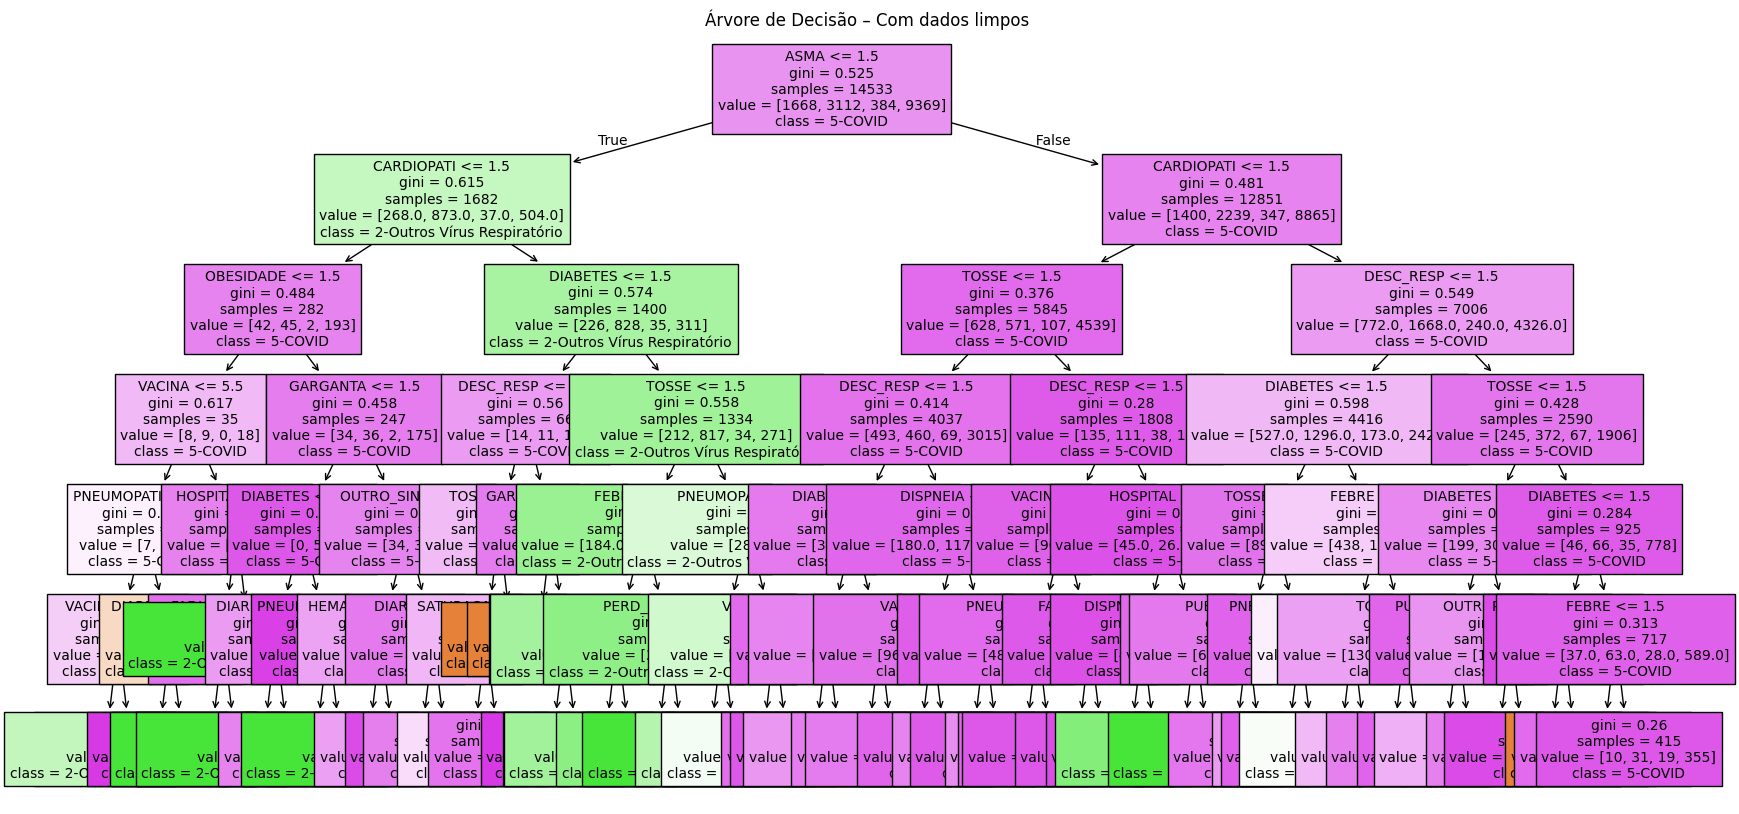

In [29]:
# Avaliação
y_pred = clf.predict(X_test)
print("Modelo com dados limpos e sem classe 3 e 4:")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Relatório detalhado com 4 casas decimais
relatorio = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

print("\nMétricas detalhadas (4 casas decimais):")
for classe, metricas in relatorio.items():
    print(f"\n{classe.capitalize() if isinstance(classe, str) else f'Classe {classe}'}")
    if isinstance(metricas, dict):
        for metrica, valor in metricas.items():
            print(f"  {metrica.capitalize():<12}: {valor:.4f}")
    else:
        print(f"  Valor        : {metricas:.4f}")

# Resumo das médias
print("\nResumo das médias principais:")
for key in ["accuracy", "macro avg", "weighted avg"]:
    print(f"\n{key.capitalize()}:")
    if isinstance(relatorio[key], dict):
        for metrica in ["precision", "recall", "f1-score"]:
            print(f"  {metrica.capitalize():<12}: {relatorio[key][metrica]:.4f}")
    else:
        print(f"  Valor        : {relatorio[key]:.4f}")

# Visualizar árvore
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns,
          class_names=['1-Influenza', '2-Outros Vírus Respiratório', '3-Outros Agentes', '5-COVID'],
          filled=True, fontsize=10)
plt.title("Árvore de Decisão – Com dados limpos")
plt.show()

